In [349]:
import numpy as np 
import matplotlib.pyplot as plt
from functools import partial, reduce
from numpy.linalg import inv
from scipy.stats import lognorm
import pylab

%matplotlib inline

# Least squares

Задаем преобразование признаков

In [350]:
def polynom(i, x):
    return x**i

Генерируем матрицу объекты-признаки

In [351]:
degree = 5
def make_poly_features(fun, X, i=degree):
    features = [fun(i, X) for i in range(i)]
    features = np.array(features).T
    return features

Получаем веса

In [352]:
#features = make_poly_features(polynom, X)
def get_weights(features, y):
    return inv(features.T@features)@features.T@y

Генерируем признаки

In [353]:
# s = 0.54
# mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

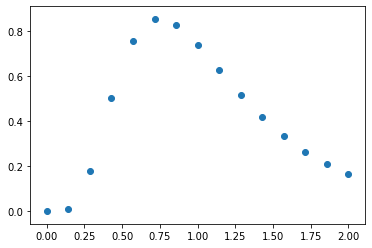

In [354]:
s = 0.54
X = np.linspace(0, 2, 15)
Y = lognorm.pdf(X, s)
plt.scatter(X, Y)

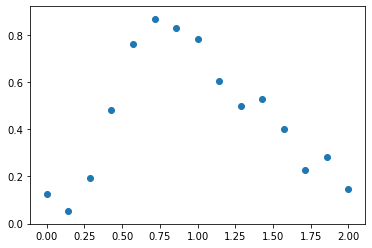

In [355]:
Y_new =[]
for i, val in enumerate(Y):
    Y_new.append(val + np.random.normal(scale = 0.07))
plt.scatter(X, Y_new)

In [356]:
def fitted_func(W, x, degree=degree):
    _sum = 0
    for i in range(degree):
        _sum += W[i]*(pow(x, i))
    return _sum

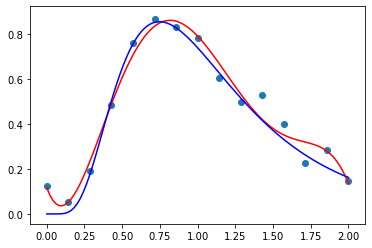

In [357]:
degree=6
X_test = np.linspace(0, 2, 100)
W = get_weights(make_poly_features(polynom, X, degree), Y_new)
pylab.scatter(X, Y_new)
pylab.plot(X_test, fitted_func(W, X_test, degree), c='red')
pylab.plot(X_test, lognorm.pdf(X_test, s), c='blue')
pylab.show()

# Overfitting

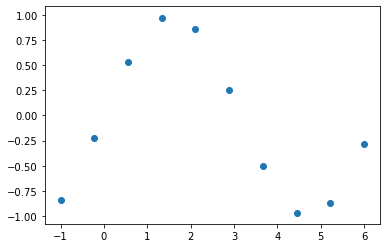

In [358]:
X_of = np.linspace(-1, 6, 10)
Y_of = np.sin(X_of)
plt.scatter(X_of, Y_of)

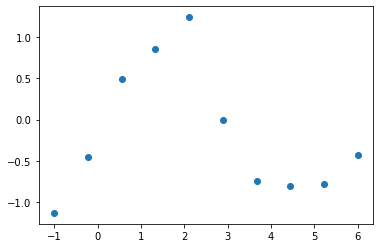

In [359]:
Y_new_of =[]
for i, val in enumerate(Y_of):
    Y_new_of.append(val + np.random.normal(scale = 0.3))
plt.scatter(X_of, Y_new_of)

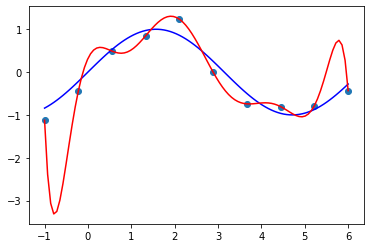

In [360]:
degree = 10
X_test_of = np.linspace(-1, 6, 100)
W_of = get_weights(make_poly_features(polynom, X_of, degree), Y_new_of)
pylab.scatter(X_of, Y_new_of)
pylab.plot(X_test_of, np.sin(X_test_of), c='blue')
pylab.plot(X_test_of, fitted_func(W_of, X_test_of, degree), c='red')
pylab.show()

# Cross validation

In [361]:
def Diff(list1, list2):
    list3 = []

    for i in list1:
        if i not in list2:
            list3.append(i)
    return list3

In [381]:
from sklearn.metrics import r2_score
from random import sample
s = 0.54
am_of_sample = 150
X = np.linspace(0, 2, am_of_sample)
Y = lognorm.pdf(X, s)

x_y = dict()

Y_new =[]
for i, val in enumerate(Y):
    Y_new.append(val + np.random.normal(scale = 0.05))

for ind, x in enumerate(X):
    x_y[x] = Y_new[ind]

avg = 0
degree = 7

am_of_s = int(am_of_sample/5)
print(am_of_s)
already_been = []
def cross_val(X, Y, frac=5, am_of_sample=100, degree =7, pr = True, sc = 0.1, reg=(False,)):
    x_y = dict()

    Y_new =[]
    for i, val in enumerate(Y):
        Y_new.append(val + np.random.normal(scale = sc))

    for ind, x in enumerate(X):
        x_y[x] = Y_new[ind]

    avg = 0
    degree = 7

    am_of_s = int(am_of_sample/frac)
#    print('Am of :',am_of_s)
    already_been = []
    
    for _ in range(0, frac):

        x_y_items = list(x_y.items())
        x_y_train = sample(Diff(x_y_items, already_been), k = am_of_s)
        x_y_test = Diff(x_y_items, x_y_train)
        already_been.extend(x_y_train)
        X_train = np.array(list(map(lambda x: x[0], x_y_train)))
        Y_train = np.array(list(map(lambda x: x[1], x_y_train)))
        X_test = np.array(list(map(lambda x: x[0], x_y_test)))
        Y_test = np.array(list(map(lambda x: x[1], x_y_test))) 

        if pr:
            print('Len  of already ', len(already_been))
            print('Len: ', len(x_y_train))
            print('Len: ', len(x_y_test))
            print(len(Y_train))
            print(len(Y_test))

        if reg[0]:
            W = get_weights_L2(make_poly_features(polynom, X_train, degree), Y_train, reg[1])
        else:
            W = get_weights(make_poly_features(polynom, X_train, degree), Y_train)
        
        if pr:
            pylab.scatter(X_test, Y_test, c = 'lightsteelblue')
            pylab.plot(X_test, fitted_func(W, X_test, degree), c='red')
            pylab.plot(X, Y, c='black')
            pylab.scatter(X_train, Y_train, c='darkred')
            pylab.show()

#        print(r2_score(Y_test, fitted_func(W, X_test, degree)))
        avg += r2_score(Y_test, fitted_func(W, X_test, degree))
#    print("Ans ", avg/frac)
    return avg/frac

30


Len  of already  50
Len:  50
Len:  200
50
200


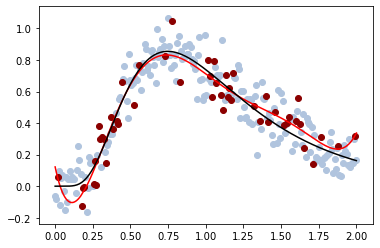

Len  of already  100
Len:  50
Len:  200
50
200


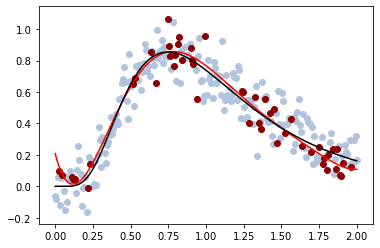

Len  of already  150
Len:  50
Len:  200
50
200


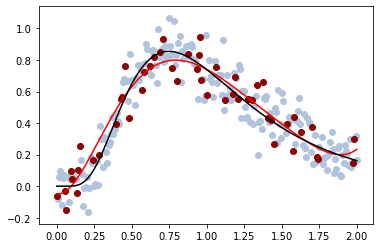

Len  of already  200
Len:  50
Len:  200
50
200


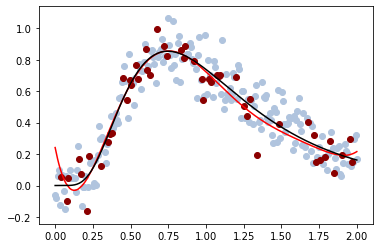

Len  of already  250
Len:  50
Len:  200
50
200


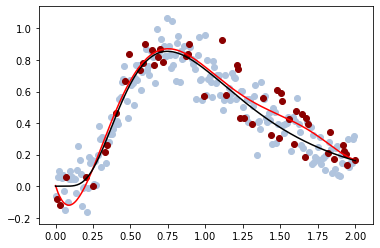

0.8474904525974793

In [382]:
count = 250
X = np.linspace(0, 2, count)
Y = lognorm.pdf(X, s)
cross_val(X, Y, frac = 5, am_of_sample=count, degree=7)

# L2

In [364]:
def get_weights_L2(features, y, alpha):
    eye = np.eye(features.shape[1])
    eye[0, 0] = 0
    return inv(features.T@features + alpha*eye)@features.T@y

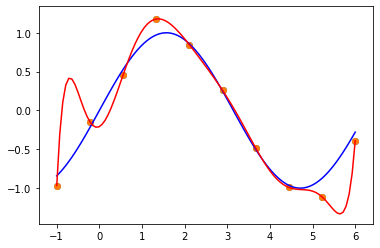

In [384]:
X_of = np.linspace(-1, 6, 10)
Y_of = np.sin(X_of)
Y_new_of =[]
for i, val in enumerate(Y_of):
    Y_new_of.append(val + np.random.normal(scale = 0.1))
plt.scatter(X_of, Y_new_of)

degree = 10
X_test_of = np.linspace(-1, 6, 100)
W_of = get_weights(make_poly_features(polynom, X_of, degree), Y_new_of)
pylab.scatter(X_of, Y_new_of)
pylab.plot(X_test_of, np.sin(X_test_of), c='blue')
pylab.plot(X_test_of, fitted_func(W_of, X_test_of, degree), c='red')
pylab.show()

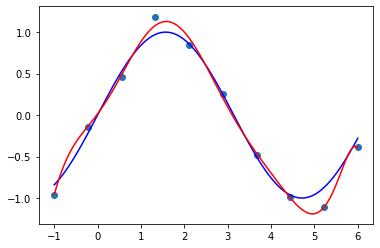

In [385]:
degree = 10
X_test_of = np.linspace(-1, 6, 100)
W_of = get_weights_L2(make_poly_features(polynom, X_of, degree), Y_new_of, alpha=0.05)
pylab.scatter(X_of, Y_new_of)
pylab.plot(X_test_of, np.sin(X_test_of), c='blue')
pylab.plot(X_test_of, fitted_func(W_of, X_test_of, degree), c='red')
pylab.show()

In [386]:
from tqdm import tqdm
count = 160
X = np.linspace(-1, 2, count)
Y = np.sin(X)
avg = 0
t = 500
for _ in tqdm(range(t)):
    avg += cross_val(X, Y, frac = 5, am_of_sample=count, degree=7,pr=False, sc = 0.3, reg=(False, 0.05))
print(avg/t)

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 140.20it/s]

0.6596120828746045


In [326]:
count = 160
X = np.linspace(-1, 2, count)
Y = np.sin(X)
alphas = []
for alpha in tqdm(np.linspace(0.0005, 0.5, 100)):
    avg = 0
    t = 100
    for _ in range(t):
        avg += cross_val(X, Y, frac = 5, am_of_sample=count, degree=7,pr=False, sc = 0.3, reg=(True, alpha))
    alphas.append(avg/t)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:17<00:00,  1.30it/s]


In [375]:
np.argmax(alphas)

65

In [387]:
(alphas[65], np.linspace(0.0005, 0.5, 100)[65])

(0.770273895339602, 0.32845454545454544)

Len  of already  32
Len:  32
Len:  128
32
128


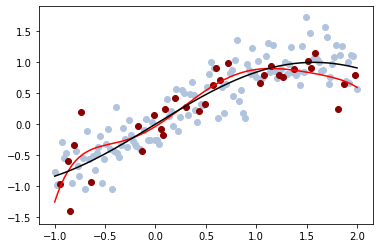

Len  of already  64
Len:  32
Len:  128
32
128


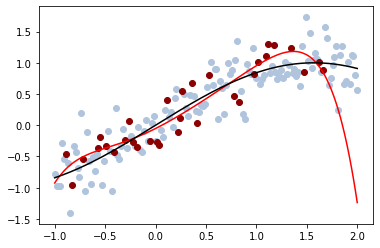

Len  of already  96
Len:  32
Len:  128
32
128


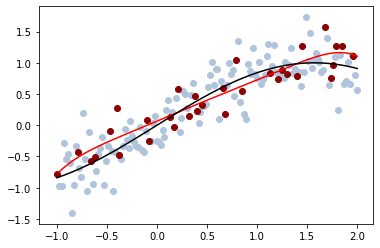

Len  of already  128
Len:  32
Len:  128
32
128


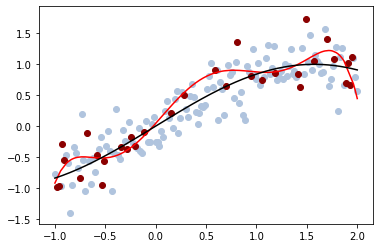

Len  of already  160
Len:  32
Len:  128
32
128


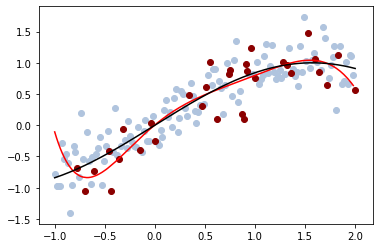

0.7039677032002248

In [388]:
cross_val(X, Y, frac = 5, am_of_sample=count, degree=7,pr=True, sc = 0.3, reg=(False, 0.328))

# SVD

In [379]:
def get_weights_SVD(features, y):
    U, D, V = np.linalg.svd(features)
    return inv(V.T@D.T@D*V)@V.T@D.T@V@y

-0.048311614852726115


IndexError: invalid index to scalar variable.

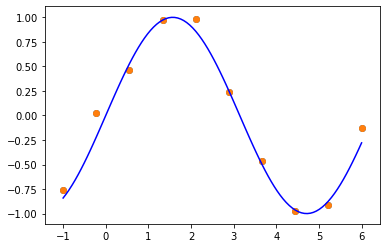

In [380]:
X_of = np.linspace(-1, 6, 10)
Y_of = np.sin(X_of)
Y_new_of =[]
for i, val in enumerate(Y_of):
    Y_new_of.append(val + np.random.normal(scale = 0.1))
plt.scatter(X_of, Y_new_of)

degree = 10
X_test_of = np.linspace(-1, 6, 100)
W_of = get_weights_SVD(make_poly_features(polynom, X_of, degree), Y_new_of)
print(W_of)
pylab.scatter(X_of, Y_new_of)
pylab.plot(X_test_of, np.sin(X_test_of), c='blue')
pylab.plot(X_test_of, fitted_func(W_of, X_test_of, degree), c='red')
pylab.show()